    1. 
    https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021


    2. 
**a.**	

    Этот набор данных был получен на основе набора данных, созданного Центром прогнозирования штормов NOAA. Основные изменения, внесенные при создании этого набора данных, заключались в удалении некоторых столбцов, изменении некоторых типов данных и сортировке по дате. Представленные данные - реальные.

**b**.

    yr - 4-digit year;
    mn - Month (1-12);
    dy - Day of month;
    date - Datetime object (e.g. 1950-01-01);
    st - State where tornado originated; 2-digit abbreviation;
    mag - F rating thru Jan 2007; EF rating after Jan 2007;
    inj - Number of injuries;
    fat - Number of fatalities;
    slat - Starting latitude in decimal degrees;
    slon - Starting longitude in decimal degrees;
    elat - Ending latitude in decimal degrees;
    elon - Ending longitude in decimal degrees;
    len - Length of track in miles;
    wid - Width in yards.
    
    Для упрощения дальнейшей работы я выберу из этого датасета столбцы, интересные для анализа.
    
**c.** 

    Торнадо часто случаются в Соединенных Штатах, приводя к огромным разрушениям и часто к ранениям и смерти. Разрушительная сила торнадо во многом зависит от скорости ветра внутри него. По этой причине метеорологи оценивают торнадо по шкале, основанной на скорости ветра. В США торнадо первоначально оценивались по шкале Фудзита, а с февраля 2007 года — по расширенной шкале Фудзита.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/user/Downloads/us_tornado_dataset_1950_2021.csv')

    Выберем интересующие столбцы из датасета для дальнейшей работы

In [4]:
df_numeric = df.iloc[:,5:14]

    3.a. 
     Определить среднее значение, СКО.

     Для удобства создам словарь, где key - это название столбца, а value - значение (в зависимости от задания). Например, *mean_value.get('slat')* выведет среднее значение значение атрибута slat. 

In [5]:
mean_value, sko_value = {}, {}
for atr in df_numeric: 
    mean_value[atr] = df_numeric[atr].mean()
    sko_value[atr] = df_numeric[atr].std()
    
mean_value.get('slat')

37.1424120000592

    3.b. 
    Построить гистограмму распределения значений, определить есть ли выбросы

	Distribution


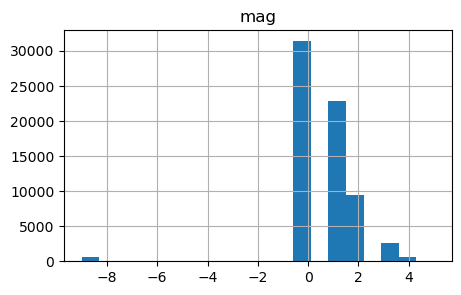

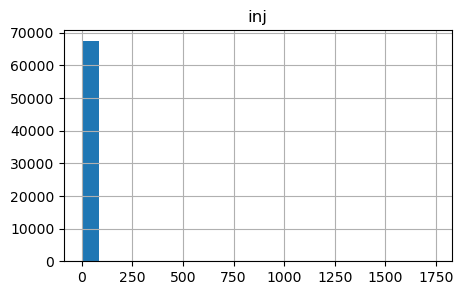

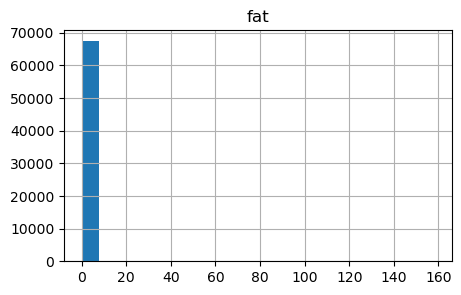

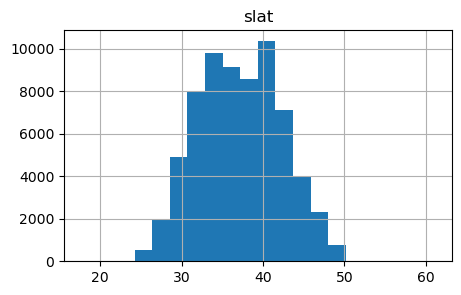

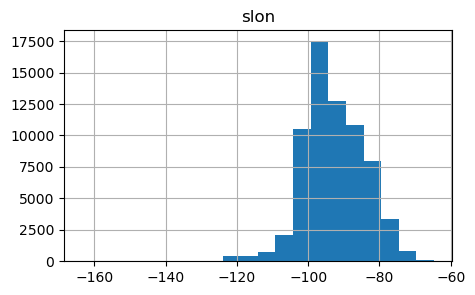

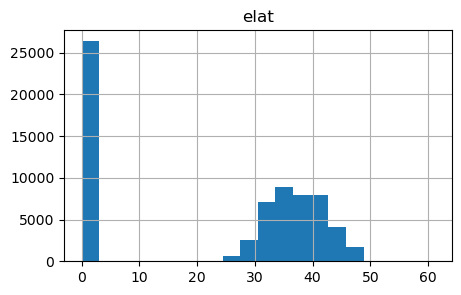

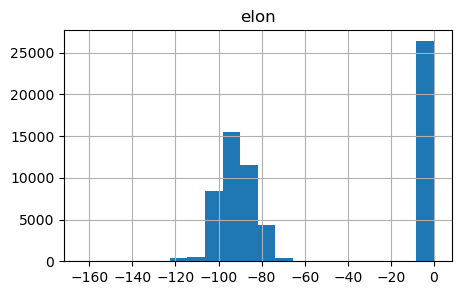

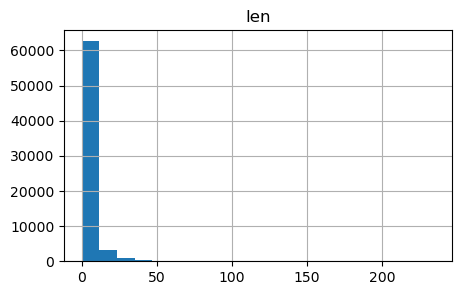

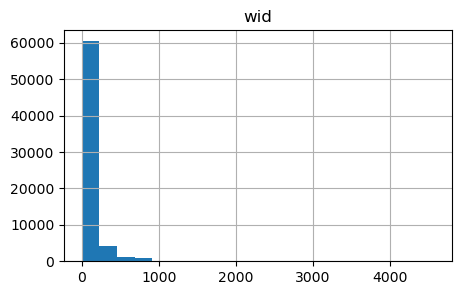

In [6]:
print("\tDistribution")
for atr in df_numeric:
    plt.figure(figsize = (5,3))
    plt.hist(df_numeric[atr], bins = 20)
    plt.grid(True)
    plt.title(atr)

    На гистограммах видно, что некоторые значения выбиваются из общей картины(0 в elon), но точнее проверить количество выбросов можно так:

In [7]:
for atr in df_numeric.columns:
    q1=df_numeric[atr].quantile(0.25)
    q3=df_numeric[atr].quantile(0.75)
    IQR=q3-q1
    outliers = df_numeric[atr][((df[atr]<(q1-1.5*IQR)) | (df_numeric[atr]>(q3+1.5*IQR)))]
    print(f"Количество выбросов в {atr} : {str(len(outliers))}")

Количество выбросов в mag : 3781
Количество выбросов в inj : 7689
Количество выбросов в fat : 1559
Количество выбросов в slat : 66
Количество выбросов в slon : 916
Количество выбросов в elat : 0
Количество выбросов в elon : 0
Количество выбросов в len : 8293
Количество выбросов в wid : 7199


    А визуализировать количество выбросов для, например, атрибута slat можно так:

Text(0.5, 1.0, 'Distribution')

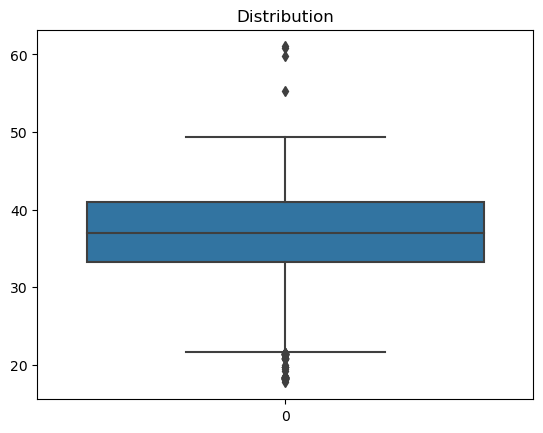

In [8]:
ax = sns.boxplot(df_numeric.slat)
plt.title('Distribution')

    Boxplot — это график, отражающий форму распределения, медиану, квартили и выбросы.
    - Минимальное наблюдаемое значение (0-й процентиль) — минимальная точка данных выборки, отображается началом левого «уса»;
    - Максимальное наблюдаемое значение выборки (100-й процентиль) — максимальная точка данных выборки, отображается концом правого «уса»;
    - Медиана (50-процентиль) — отображается чертой, разделяющей «ящик» на две части;
    - 1-й квартиль или 25-й процентиль — представляется левой стороной «ящика»;
    - 3-й квартиль или 75-й процентиль — представляется правой стороной «ящика»;
    - Отметки, отображаемые на диаграмме кружками, представляют собой выбросы данных.

    3.c,d.
    Определить количество пропущенных значений можно так:

In [9]:
df_numeric.isna().sum()

mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64

    Однако, конкретно в моем датасете пропущенные значения обозначались как **0, а не NA**.
    Поэтому в данном случае буду считать пропущенные значения выбросами. Это и есть способ обработки.

    4.a,b. 
    Определить, какие атрибуты высококоррелированы и характер их корреляции, а также какие атрибуты не имеют корреляцию.

In [10]:
corr = df_numeric.corr()
corr.style.background_gradient(cmap = 'coolwarm', axis=None)

    Установив axis=None, можно вычислять цвета ячеек на основе всей матрицы для удобства определения коррелирования.
    Положительная корреляция - когда одна переменная увеличивается, другая также увеличивается, а отрицательная корреляция - когда одна переменная увеличивается, другая уменьшается.
    Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная коррелирует сама с собой.
    Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных. Например, коэффициент корреляции между len и fat равен 0.237817.
    Чем дальше коэффициент корреляции от нуля, тем сильнее связь между двумя переменными. Таким образом, высококоррелированы атрибуты ing - fat; elon - elat. А слабее всего корреляция между len - slat.


    4.c. 
    Построить матрицы графиков рассеивания.

    Построить график рассеивания, например, атрибутов elon - elat можно так:

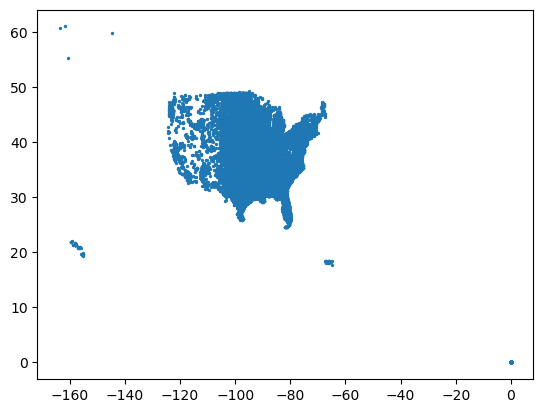

In [11]:
plt.scatter(df_numeric.elon, df_numeric.elat, s = 2)

    Построить матрицу графиков рассеивания можно так, но выглядит это немного мутно!

array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='inj', ylabel='mag'>,
        <Axes: xlabel='fat', ylabel='mag'>,
        <Axes: xlabel='slat', ylabel='mag'>,
        <Axes: xlabel='slon', ylabel='mag'>,
        <Axes: xlabel='elat', ylabel='mag'>,
        <Axes: xlabel='elon', ylabel='mag'>,
        <Axes: xlabel='len', ylabel='mag'>,
        <Axes: xlabel='wid', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='inj'>,
        <Axes: xlabel='inj', ylabel='inj'>,
        <Axes: xlabel='fat', ylabel='inj'>,
        <Axes: xlabel='slat', ylabel='inj'>,
        <Axes: xlabel='slon', ylabel='inj'>,
        <Axes: xlabel='elat', ylabel='inj'>,
        <Axes: xlabel='elon', ylabel='inj'>,
        <Axes: xlabel='len', ylabel='inj'>,
        <Axes: xlabel='wid', ylabel='inj'>],
       [<Axes: xlabel='mag', ylabel='fat'>,
        <Axes: xlabel='inj', ylabel='fat'>,
        <Axes: xlabel='fat', ylabel='fat'>,
        <Axes: xlabel='slat', ylabel='fat'>,
        <Axes: xlabel

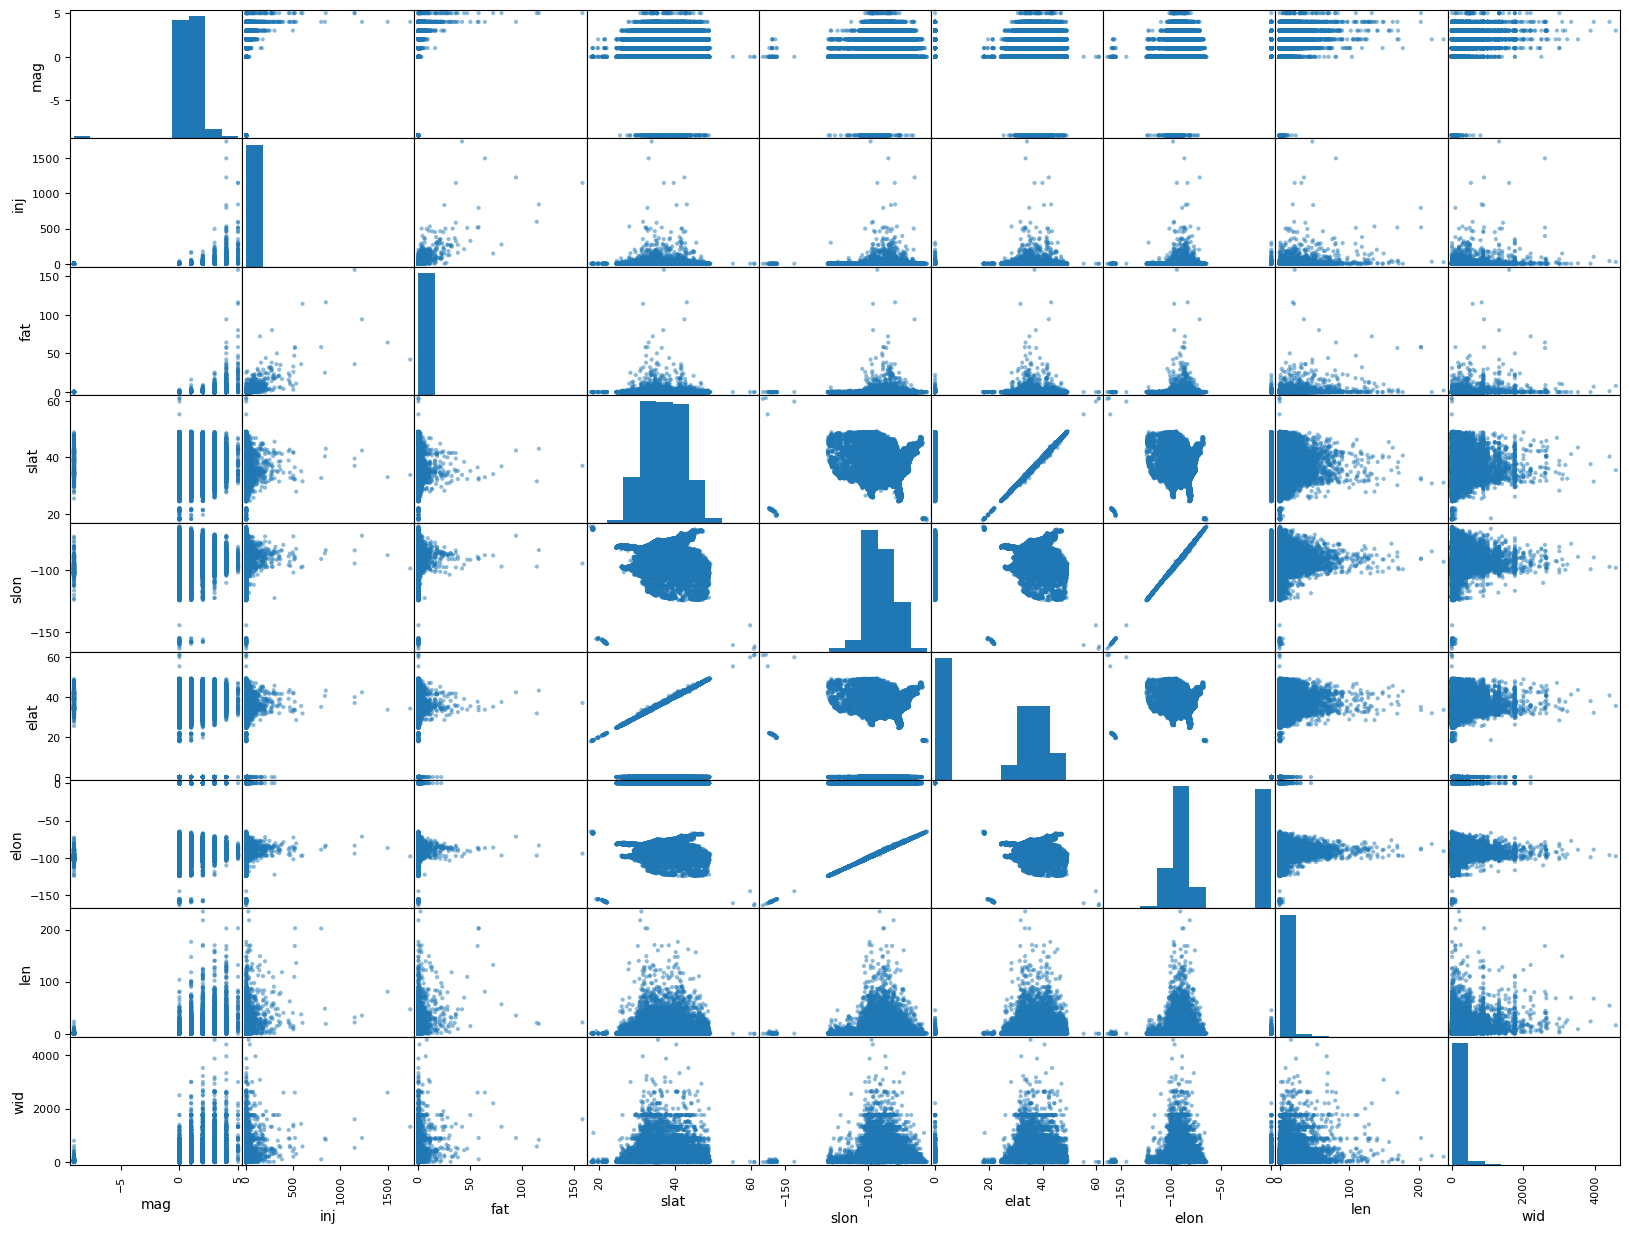

In [12]:
pd.plotting.scatter_matrix(df_numeric, figsize=(20, 15))

    4.d.
      Отображаемые на диаграммах рассеяния паттерны позволяют увидеть разные типы корреляции.
      Почти на всех графиках видно слабую(точки расположены далеко друг от друга) криволинейную зависимость, либо вообще ее отсутствие(точки разбросаны хаотично, elon - len). Отстутствие корреляция в данном случае объясняется легко. Например, даже на уровне теории данные wid(ширина в ярдах) - slat(начальная широта в десятичных градусах) вообще не связаны. Отдельные графики вообще трудно отнести к конкретному типу(fat - len) из-за большого количества выбросов и, опять же, независимости данных. 
      График elon - elat показывает сильную отрицательную корреляцию, но, опять же, с выбросами!
      Однако, корреляция – это не причинная зависимость, поэтому на результаты может повлиять не принятый во внимание факт.